# RANDOM FORESTS ALGORITHM
#### MATH CONCEPTS FOR DEVELOPERS, FINAL PROJECT - SOFTUNI 2025

#### Random Forest Classifier Demonstration
##### This notebook demonstrates how the Random Forest algorithm works on classification and regression problems using real datasets.


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Classification and Regression
from sklearn.model_selection import train_test_split # Split data into training and test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error # Model evaluation

In [96]:
# import kagglehub
# 
# # Download latest version
# path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
# 
# print("Path to dataset files:", path)

#Here we download dataset

### Breast Cancer Wisconsin (Diagnostic) Data Set

In [97]:
data = pd.read_csv("data/data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Main Features and Their Meanings

Each sample in the dataset represents measurements of a breast cell nucleus extracted from a digital image taken during a fine needle aspiration (FNA). The dataset includes 30 features derived from 10 main physical characteristics, each calculated using three statistical methods: mean (average), standard error (SE), and worst (maximum value). These measurements help determine whether a tumor is benign or malignant.

1. **Radius** – The mean distance from the center of the nucleus to the cell perimeter.  
   This value reflects the overall size of the cell. Larger radius values are often associated with malignant tumors.

2. **Texture** – The standard deviation of gray-scale values in the cell image.  
   It reflects the variation in pixel intensity across the cell surface.  
   - Low texture → smooth and uniform cells (likely benign)  
   - High texture → irregular and rough cells (likely malignant)

3. **Perimeter** – The total length of the cell boundary.  
   It is directly related to radius and gives an estimate of how large and complex the shape of the cell is.

4. **Area** – The area enclosed by the cell boundary.  
   A larger area typically indicates a larger cell size, which can be a sign of abnormal or malignant cells.

5. **Smoothness** – Measures local variation in the cell boundary.  
   Lower values mean the edges of the cell are smooth and regular. Higher values suggest jagged or irregular edges, which are common in malignant cells.

6. **Compactness** – Calculated as (perimeter² / area) - 1.0.  
   This measures how closely packed the cell contents are. Higher values indicate more irregular or extended cell shapes.

7. **Concavity** – Describes the extent of concave (inward-curved) sections of the cell boundary.  
   Deep concavities are typically seen in irregular, potentially malignant cell shapes.

8. **Concave Points** – The number of distinct concave portions along the cell boundary.  
   A higher number indicates more indentations or notches, often found in abnormal cells.

9. **Symmetry** – Measures how symmetrical the cell is in shape.  
   Healthy (benign) cells tend to be more symmetrical, while malignant ones often display asymmetry.

10. **Fractal Dimension** – Describes the complexity of the cell boundary.  
    Higher fractal dimension means the border is more irregular and complex, which may be a characteristic of malignancy.

Each of the above features is measured in three different ways:

- `mean`: The average value of the feature across multiple measurements in a single image.
- `se` (standard error): The estimated variation or uncertainty in that measurement.
- `worst`: The maximum value observed for the feature (e.g., largest radius or most irregular texture).

Тhese 30 numerical features form the input variables used by machine learning models to predict the tumor class (benign or malignant).



### Diagnosis
##### M - Malignant, indicating a cancerous (dangerous) tumor.
##### B - Benign, indicating a non-cancerous (harmless) tumor.

In [98]:
counts_m = data['diagnosis'].value_counts()
counts_m

diagnosis
B    357
M    212
Name: count, dtype: int64

### Smoothness Mean

In [99]:
data = pd.read_csv('data/data.csv')
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [100]:
df = data[['diagnosis', 'smoothness_mean']]
df

,diagnosis,smoothness_mean
0,M,0.11840
1,M,0.08474
2,M,0.10960
3,M,0.14250
4,M,0.10030
...,...,...
564,M,0.11100
565,M,0.09780
566,M,0.08455
567,M,0.11780


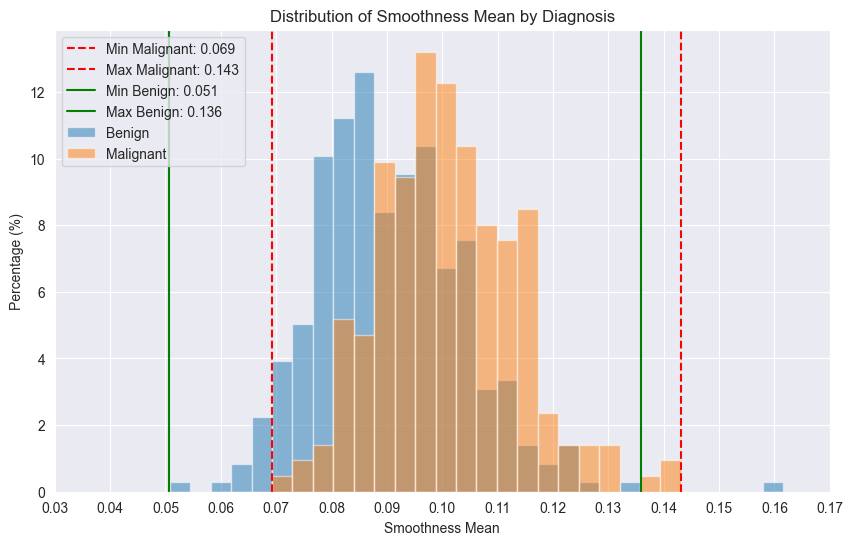

In [166]:
benign = df[df['diagnosis'] == 'B']['smoothness_mean']
malignant = df[df['diagnosis'] == 'M']['smoothness_mean']

min_malignant = malignant.min() - 0.0045
max_malignant = malignant.max() - 0.0015
min_benign = benign.min() - 0.002
max_benign = benign.max() - 0.0275

plt.figure(figsize=(10, 6))

counts_benign, bins = np.histogram(benign, bins=30)
counts_malignant, _ = np.histogram(malignant, bins=bins)

counts_benign_percent = counts_benign / counts_benign.sum() * 100
counts_malignant_percent = counts_malignant / counts_malignant.sum() * 100

bin_width = bins[1] - bins[0]

plt.bar(bins[:-1], counts_benign_percent, width=bin_width, alpha=0.5, label='Benign')
plt.bar(bins[:-1], counts_malignant_percent, width=bin_width, alpha=0.5, label='Malignant')

plt.title('Distribution of Smoothness Mean by Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Percentage (%)')

plt.axvline(min_malignant, color='red', linestyle='--', label=f'Min Malignant: {min_malignant:.3f}')
plt.axvline(max_malignant, color='red', linestyle='--', label=f'Max Malignant: {max_malignant:.3f}')
plt.axvline(min_benign, color='green', linestyle='-', label=f'Min Benign: {min_benign:.3f}')
plt.axvline(max_benign, color='green', linestyle='-', label=f'Max Benign: {max_benign:.3f}')

plt.xticks(np.arange(0.03, 0.17, 0.01))

plt.legend()
plt.show()



In [167]:
percent_of_benign_under = ((df.smoothness_mean < 0.069).sum() / len(df)) * 100
percent_of_benign_under
# Under 0.069 smoothness mean are diagnosis with B (benign tumor). This case are 1.23 % of people.

np.float64(1.2302284710017575)

In [169]:
percent_of_benign_above = ((df.smoothness_mean > 0.143).sum() / len(df)) * 100
percent_of_benign_above
# Smoothness mean 0.143 is the last for M diagnosis. Next case is with more than 0.16 smoothness mean with diagnosis B. This extreme case does not describe a specific group of people, but only individual cases that cannot give us a good overall picture and information.

np.float64(0.35149384885764495)

In [170]:
percent_of_benign_above_1 = ((df['smoothness_mean'] < 0.1) & (df['smoothness_mean'] > 0.069) & (df['diagnosis'] == 'B')).sum() / len(df) * 100
percent_of_benign_above_1

# 42.17% with smoothness mean between 0.069 and 0.1 have diagnosis B (Benign tumor)

np.float64(44.63971880492091)